In [1]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('NCVS_Select_-_Personal_Victimization.csv')
df.describe()

,yearq,year,ager,sex,hispanic,race,race_ethnicity,hincome1,hincome2,marital,...,weapcat,injury,serious,treatment,offenderage,offendersex,offtracenew,wgtviccy,series,newwgt
count,63465.000000,63465.000000,63465.000000,63465.000000,63465.000000,63465.000000,63465.000000,63465.000000,63465.000000,63465.000000,...,63465.000000,63465.000000,63465.000000,63465.000000,63465.000000,63465.000000,63465.000000,63465.000000,63465.000000,63465.000000
mean,2004.862075,2004.611849,3.067470,1.483164,2.415835,1.304703,1.907981,13.849980,-0.443945,2.289025,...,0.945891,0.244954,1.560545,0.353975,12.552730,2.713574,0.185520,2883.301344,1.046561,3838.413256
std,9.070978,9.071131,1.426953,0.499720,6.824125,0.785357,1.718922,26.714528,1.343024,5.523102,...,1.624882,0.430063,2.975550,0.752354,26.348177,10.734711,2.416224,1360.983143,0.210699,5177.455953
min,1993.100000,1993.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,-1.000000,-9.000000,1.000000,-9.000000
25%,1996.400000,1996.000000,2.000000,1.000000,2.000000,1.000000,1.000000,3.000000,-1.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,3.000000,1.000000,-1.000000,2187.949140,1.000000,2212.159270
50%,2003.100000,2003.000000,3.000000,1.000000,2.000000,1.000000,1.000000,5.000000,-1.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,4.000000,1.000000,-1.000000,2629.440330,1.000000,2691.935770
75%,2013.200000,2013.000000,4.000000,2.000000,2.000000,1.000000,2.000000,7.000000,-1.000000,2.000000,...,1.000000,0.000000,1.000000,0.000000,4.000000,2.000000,1.000000,3377.585570,1.000000,3559.096790
max,2021.400000,2021.000000,6.000000,2.000000,88.000000,5.000000,6.000000,88.000000,5.000000,88.000000,...,5.000000,1.000000,88.000000,88.000000,88.000000,88.000000,11.000000,37972.447130,2.000000,153486.647700


**Cleaning Out-Of-Range Values**

In [3]:
for columns in df:
    print(df[columns].describe())
    print('-'*15)

count                           63465
unique                          49009
top       289451410835718456498415301
freq                               15
Name: idper, dtype: object
---------------
count    63465.000000
mean      2004.862075
std          9.070978
min       1993.100000
25%       1996.400000
50%       2003.100000
75%       2013.200000
max       2021.400000
Name: yearq, dtype: float64
---------------
count    63465.000000
mean      2004.611849
std          9.071131
min       1993.000000
25%       1996.000000
50%       2003.000000
75%       2013.000000
max       2021.000000
Name: year, dtype: float64
---------------
count    63465.000000
mean         3.067470
std          1.426953
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: ager, dtype: float64
---------------
count    63465.000000
mean         1.483164
std          0.499720
min          1.000000
25%          1.000000
50%          1.000000
75%          2.

**Check Missing Values**

In [4]:
for columns in df:
    missingValues = df[columns].isnull().sum()
    if missingValues > 0:
        print(columns,':',missingValues)
    

In [5]:
df['locality'].value_counts()

locality
-1    60034
 2     2343
 3      556
 1      532
Name: count, dtype: int64

**Check for Duplicate Case ID**

In [6]:
for row in df['idper'].duplicated():
    if row == "True":
        print(row)


Summary:
    No Missing Values,
    No Outliers, All Values are in range

In [7]:
def calculateInvalidValues(missingValue, columnName):
    missing = (df[columnName] == missingValue).sum()/df[columnName].count()* 100
    print(f'{columnName} : {missing}%')

In [8]:
calculateInvalidValues(-1, 'hincome2')
calculateInvalidValues(-1, 'locality')
calculateInvalidValues(-1, 'offtracenew')
calculateInvalidValues(-2, 'veteran')
calculateInvalidValues(-1, 'citizen')

hincome2 : 83.61616639092414%
locality : 94.59387063735917%
offtracenew : 71.14314976758843%
veteran : 83.61616639092414%
citizen : 83.61616639092414%


Drop Columns

In [9]:
df = df.drop(df[df['sex'] == 1].index)
df = df.drop(columns=['idper', 'yearq', 'hispanic',
       'race_ethnicity', 'hincome2', 'educatn2', 'veteran','msa',
       'citizen', 'newcrime', 'seriousviolent',
       'vicservices', 'locationr','weapon', 'weapcat', 'injury',
       'serious', 'treatment', 'offtracenew',
       'wgtviccy', 'series', 'newwgt'])

Dropped Columns:

| No. | Columns | Reason |
| --- | --- | --- |
| 1 | idper | unessecary in this analysis|
| 2 | yearq | irrelevant|
| 3 | hispanic | irrelevant|
| 4 | race_ethnicity | irrelevant, using race|
| 5 | hincome2 | 83% rows invalid data|
| 6 | locality | 94% rows invalid data|
| 7 | msa| irrelevant|
| 8 | veteran| 83% rows invalid data|
| 9 | citizen| 83% rows invalid data|
| 10 | newcrime |irrelvant|
| 11 | seriousviolent |irrelvant|
| 12 | sex == 1|male population|
| 13 | vicservices | irrelevant|
| 14 | locationr | irrelevant|
| 15 | weapon & weapcat | irrelevant|
| 16 | injury | irrelevant|
| 17 | serious | irrelevant|
| 18 | offtracenew | 90% invalid values|
| 19 | treatment | irrelevant|
| 20 | wgtviccy | irrelevant|
| 19 | series | irrelevant|
| 20 | newwgt | irrelevant |



Data Visualization


In [10]:
dfv = pd.DataFrame()

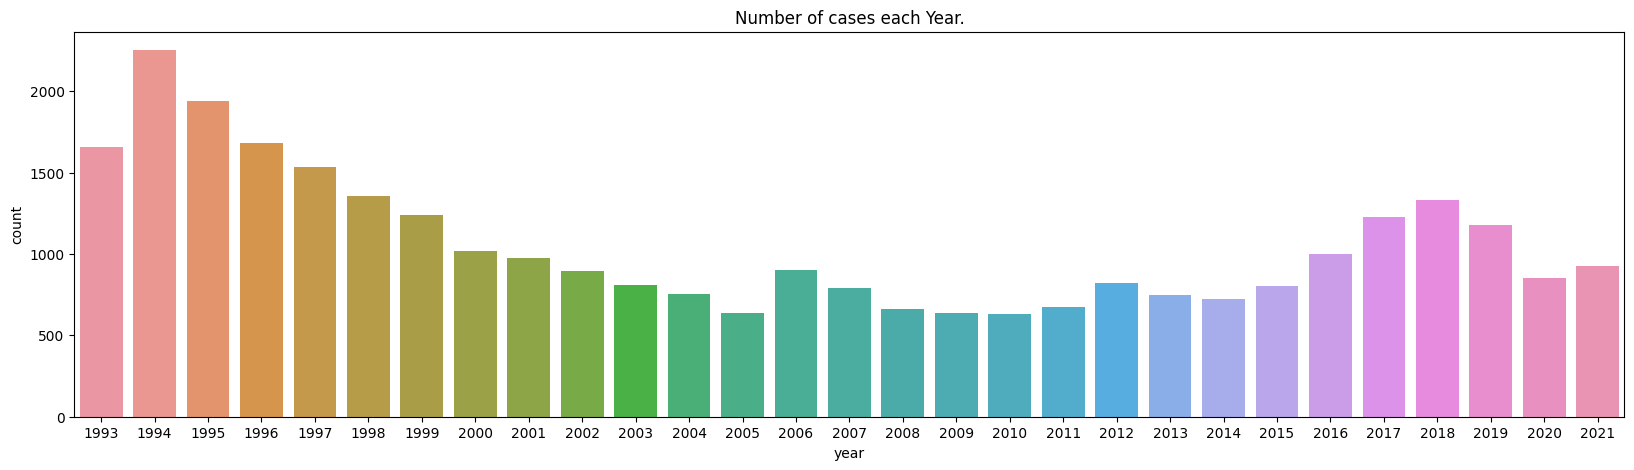

In [11]:
#Count by Year
plt.figure(figsize=(20,5))
plt.title('Number of cases each Year.')
sns.countplot(data=df,x=df['year'])
plt.savefig('Number of cases each Year.png',format='png')

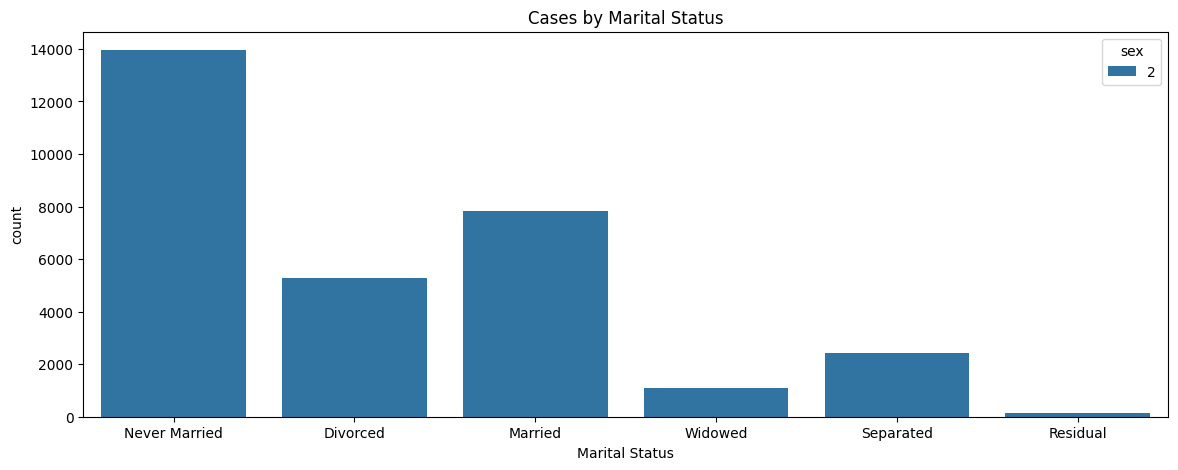

In [12]:
plt.figure(figsize=(14,5))
plt.title('Cases by Marital Status')
df['maritalStatus'] = [{1: 'Never Married', 2: 'Married',3 : 'Widowed', 4: 'Divorced', 5: 'Separated', 88:'Residual'}[row] for row in df['marital']]
sns.countplot(data=df,x=df['maritalStatus'], hue = df['sex'])
plt.xlabel('Marital Status')
df = df.drop(columns = ['maritalStatus'])    
plt.savefig('Cases by Marital Status.png',format='png')

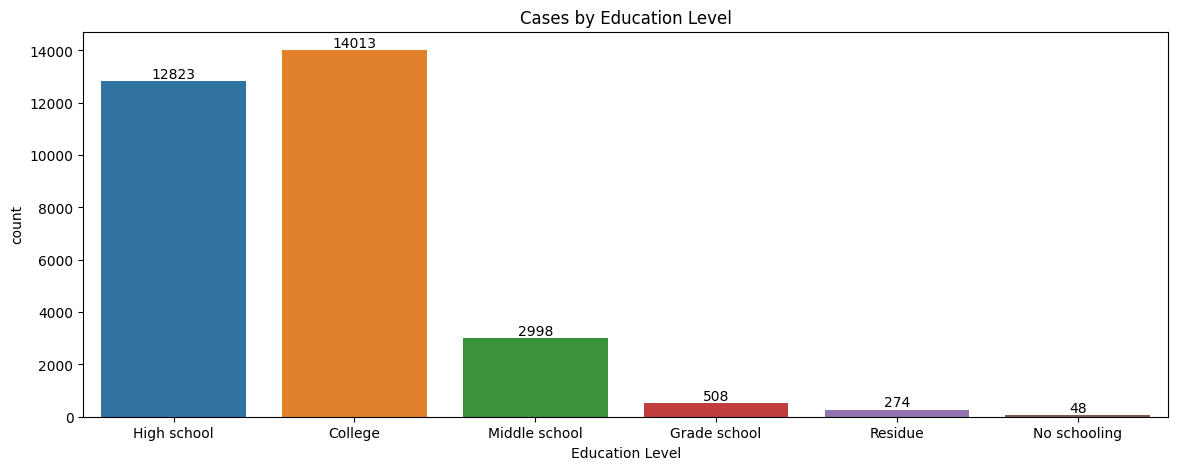

In [13]:
plt.figure(figsize=(14,5))
plt.title('Cases by Education Level')
dict = {1:'No schooling',2:'Grade school',3:'Middle school',4:'High school',5:'College',88:'Residue'}
dfv['education'] = [dict[row] for row in df['educatn1']]
fig = sns.countplot(data=df,x=dfv['education'])
fig.bar_label(fig.containers[0])
plt.xlabel('Education Level')
plt.savefig('Cases by Education Level.png',format='png')

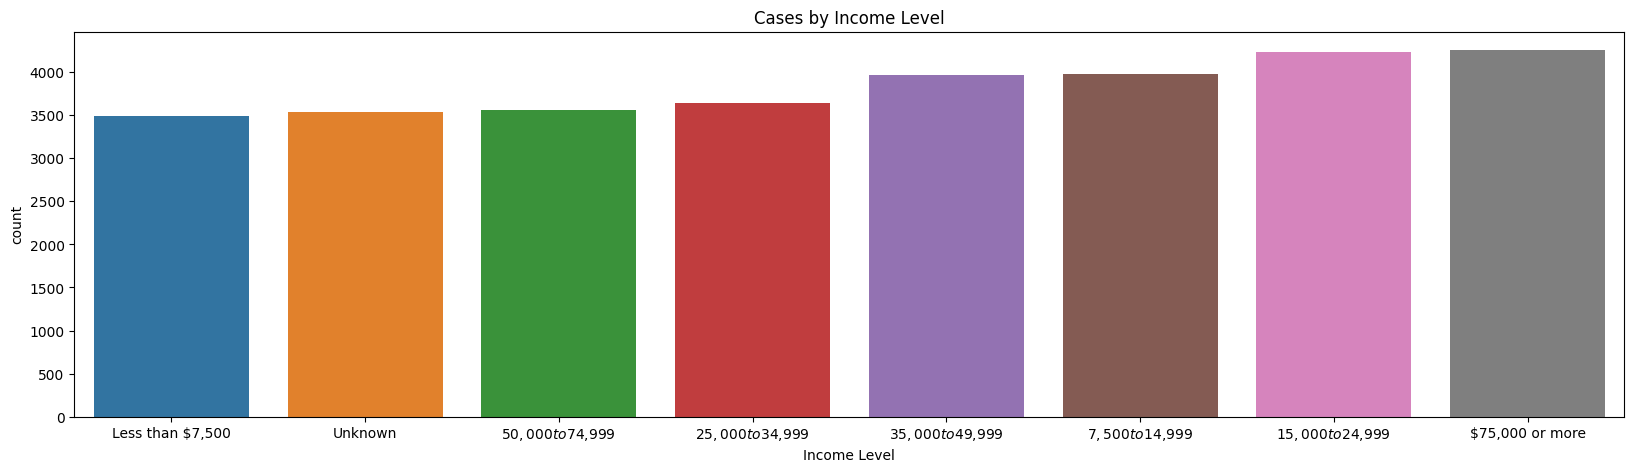

In [14]:
plt.figure(figsize=(20,5))
plt.title('Cases by Income Level')
dict = {1:'Less than $7,500',2:'$7,500 to $14,999',3:'$15,000 to $24,999',4:'$25,000 to $34,999',5:'$35,000 to $49,999'
        ,6:'$50,000 to $74,999',7:'$75,000 or more',88:'Unknown'}
dfv['income'] = [dict[row] for row in df['hincome1']]  
sns.countplot(data=df,x=dfv['income'], order= dfv['income'].value_counts(ascending=True).index)
plt.xlabel('Income Level')
plt.savefig('Cases by Income Level.png',format='png')

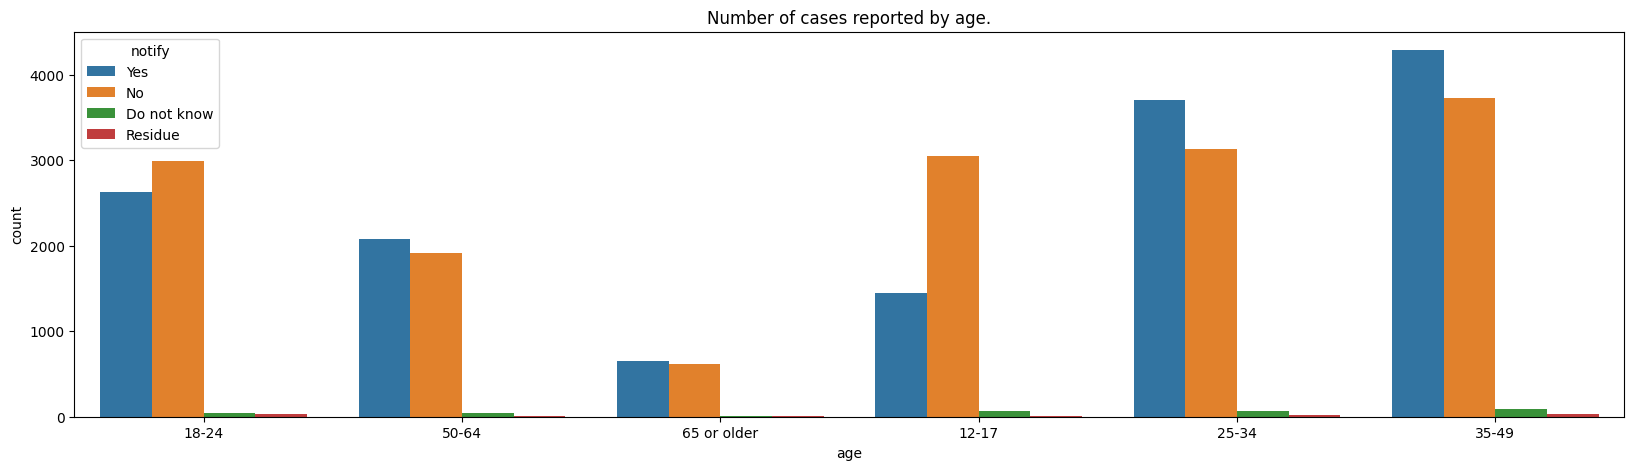

In [15]:
plt.figure(figsize=(20,5))
dict = {1:'12-17',2:'18-24',3:'25-34',4:'35-49',5:'50-64'
        ,6:'65 or older'}
dfv['age'] = [dict[row] for row in df['ager']]  
dict = {1:'Yes',2:'No',3:'Do not know',
        8:'Residue'}
dfv['notify'] = [dict[row] for row in df['notify']]  
plt.xlabel('Age Group')
plt.title('Number of cases reported by age.')
sns.countplot(data=dfv,x='age',hue='notify')
plt.savefig('Number of cases reported by age..png',format='png')

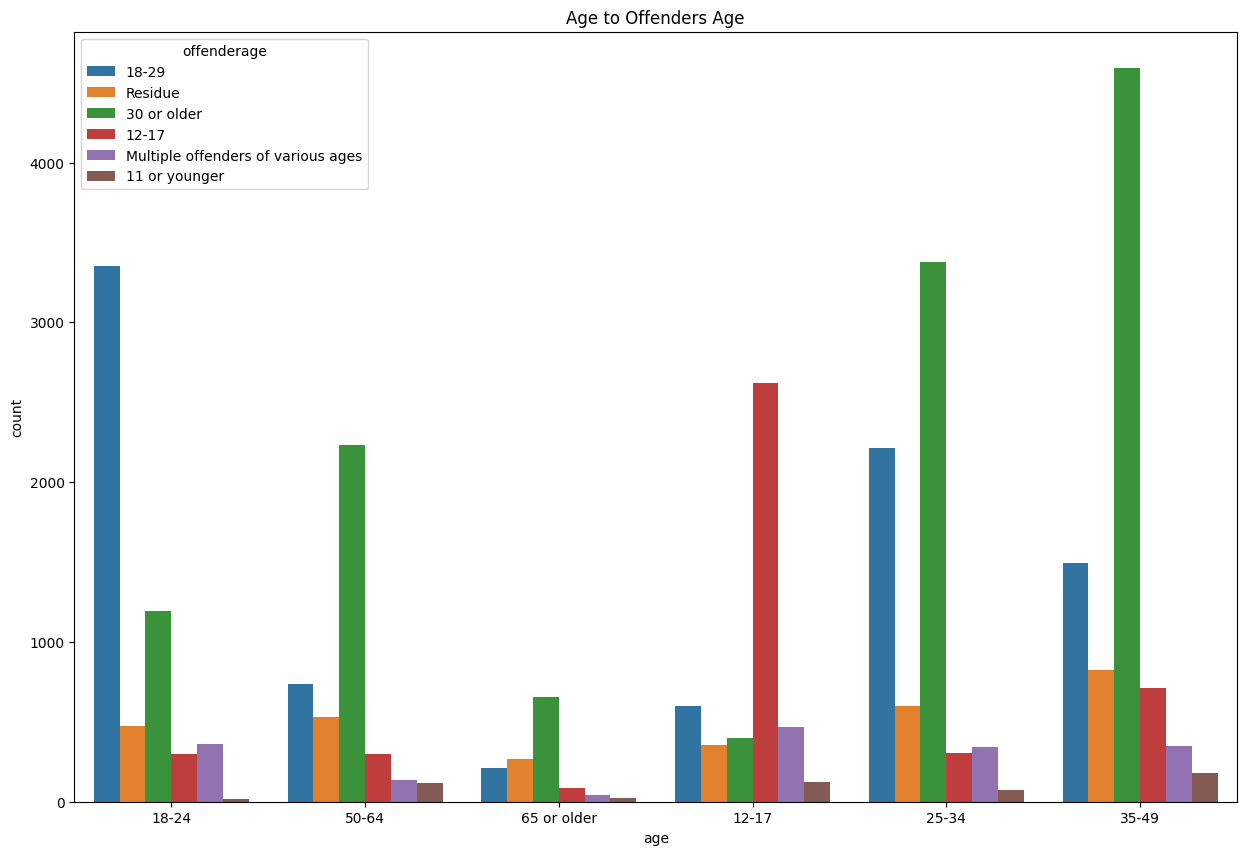

In [16]:
plt.figure(figsize=(15,10))
dict = {1:'11 or younger',2:'12-17',3:'18-29',4:'30 or older',5:'Multiple offenders of various ages'
        ,88:'Residue'}
dfv['offenderage'] = [dict[row] for row in df['offenderage']]  
plt.title('Age to Offenders Age')
sns.countplot(data=dfv,x='age', hue='offenderage')
plt.savefig('Age.png',format='png')

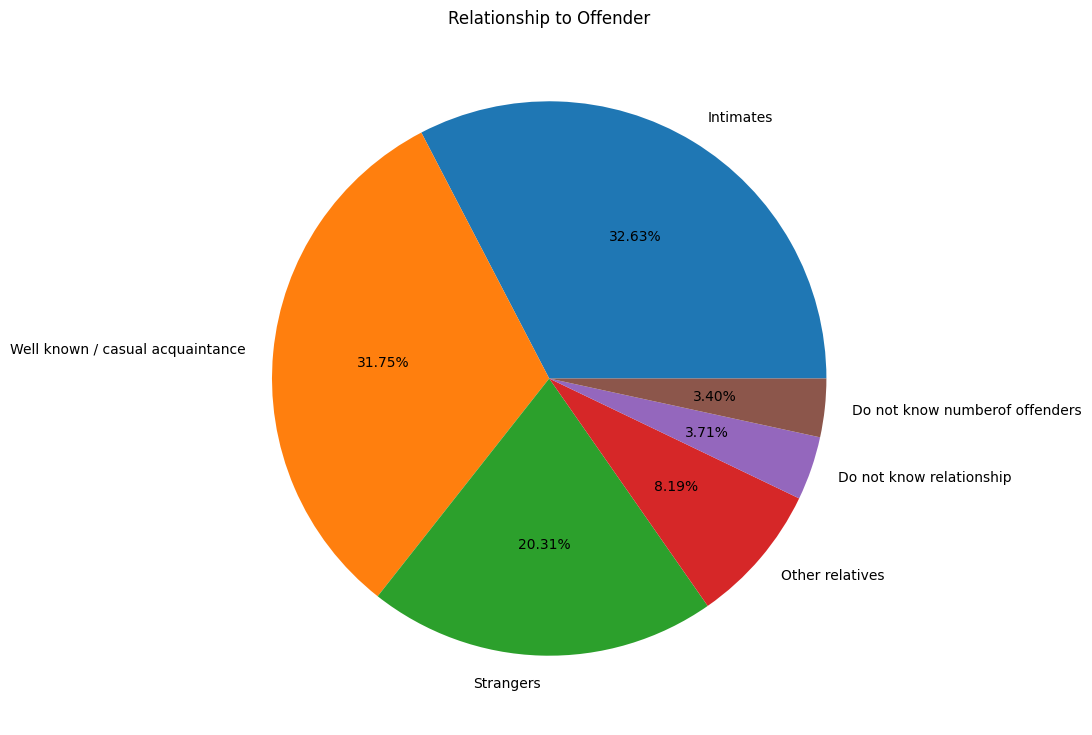

In [17]:
plt.figure(figsize=(18,9))
plt.title('Relationship to Offender')
dict = {1:'Intimates',2:'Other relatives',3:'Well known / casual acquaintance',
        4:'Strangers',5:'Do not know relationship',6:'Do not know numberof offenders'}
dfv['direl'] = [dict[row] for row in df['direl']]
plt.pie(dfv['direl'].value_counts().tolist(), labels=dfv['direl'].unique().tolist(),autopct='%.2f%%')
plt.show()


# Visualizations according to LR Findings 

<Axes: title={'center': 'Age to Offenders Relationship'}, xlabel='age', ylabel='count'>

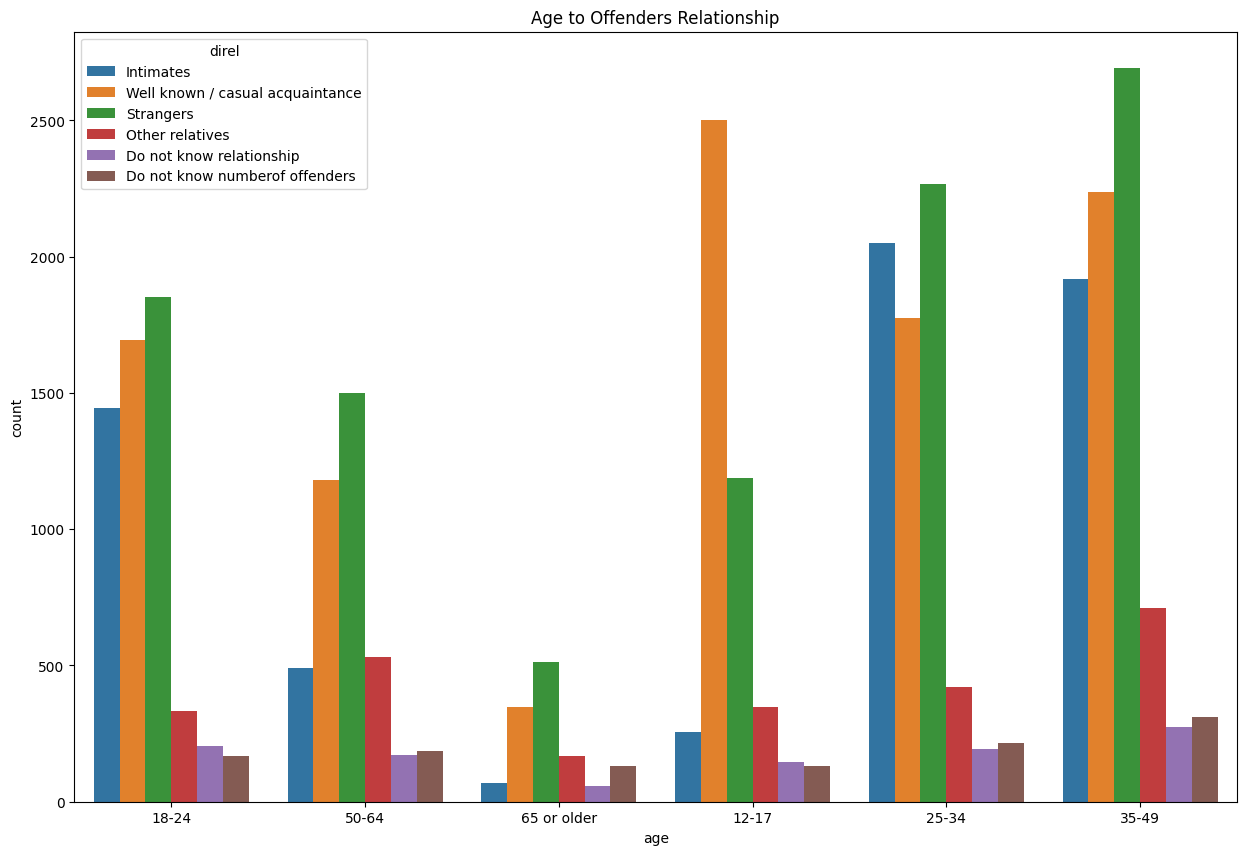

In [18]:
plt.figure(figsize=(15,10))
plt.title('Age to Offenders Relationship')
sns.countplot(data=dfv,x='age', hue='direl')

1. Younger women between the ages of 15 and 19 are more vulnerable to IPV.
  - Theres no age group for 15-19, only 12-17,18-24. Findings show IPV violence is not frequent <br>
  Caveat = Girls 15-19 tend to not have IP's , the findings does not disprove hypothesis

In [20]:
from pandasql import sqldf
query = ('SELECT * FROM df WHERE educatn1 <= 3 AND hincome1 <= 3' )


TypeError: read_sql() missing 1 required positional argument: 'con'

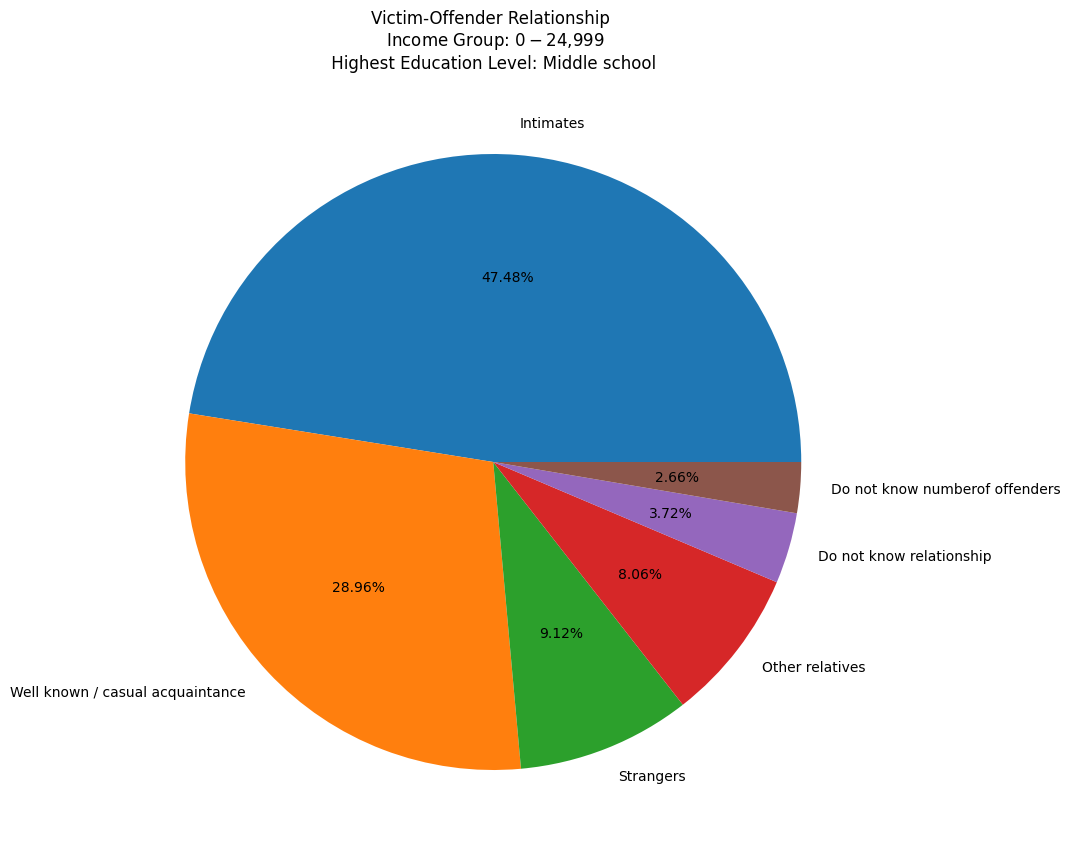

In [ ]:
plt.figure(figsize=(15,10))
plt.title('Victim-Offender Relationship \n Income Group: $0 - $24,999 \n Highest Education Level: Middle school ')
plt.pie(tempdf['direl'].value_counts().tolist(), 
        labels=dfv['direl'].unique().tolist(),autopct='%.2f%%')
plt.show()

2. women with lower levels of education, limited access to finances, and living in joint families are also more susceptible to IPV
 